In [1]:
import os, sys
sys.path.append(os.pardir)
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from statannot import add_stat_annotation
import torch
from torch.nn.functional import mse_loss
from torchmetrics.functional import pearson_corrcoef
import pytorch_lightning as pl
from src.datamodules.datamodule import BaseDataModule
from src.datamodules.components.dataset import BaseDataset
from src.models.model import BaseNet
from src.models.components.cnn import CNN
from src.models.components.rnn import RNN
from src.models.components.deepfam import DeepFam
from src.models.components.trfmdecode import TRFMDecode
from src.models.components.cnnrnntrfm import CNNRNNTRFM

/data/project/danyoung/miniconda3/envs/dream/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def evaluate(preds, targets):
    per_reporter_rmse = []
    per_reporter_corr = []
    per_timepoint_rmse = []
    per_timepoint_corr = []
    for i in range(preds.size(0)):
        rmse = mse_loss(preds[i], targets[i]).sqrt().item()
        corr = pearson_corrcoef(preds[i], targets[i]).item()
        per_reporter_rmse.append(rmse)
        per_reporter_corr.append(corr)
    for j in range(preds.size(1)):
        rmse = mse_loss(preds[:, j], targets[:, j]).sqrt().item()
        corr = pearson_corrcoef(preds[:, j], targets[:, j]).item()
        per_timepoint_rmse.append(rmse)
        per_timepoint_corr.append(corr)
    per_reporter_rmse = np.array(per_reporter_rmse)
    per_reporter_corr = np.array(per_reporter_corr)
    per_timepoint_rmse = np.array(per_timepoint_rmse)
    per_timepoint_corr = np.array(per_timepoint_corr)
    
    return per_reporter_rmse, per_reporter_corr, per_timepoint_rmse, per_timepoint_corr

In [3]:
def get_ensemble_pred(model, dm, trainer, ckpts):
    
    preds = []
    for ckpt in ckpts:
        results = trainer.predict(model=model, datamodule=dm, ckpt_path=ckpt)
        temp_pred, temp_target = [], []
        for pred, target in results:
            temp_pred.append(pred)
            temp_target.append(target)
        preds.append(torch.cat(temp_pred, axis=0).unsqueeze(-1))
        targets = torch.cat(temp_target, axis=0)
    preds = torch.cat(preds, axis=-1).mean(-1)
    
    return preds, targets

In [4]:
per_reporter_rmses, per_reporter_corrs, per_timepoint_rmses, per_timepoint_corrs = [], [], [], []

In [5]:
model = BaseNet(CNN())
dm = BaseDataModule(test_dir="/data/project/danyoung/deeputr-termproj/data/test_mac.csv")
trainer = pl.Trainer(gpus=[1])
ckpts = [f"../logs/experiments/runs/CNN/ckpts/seed{seed}.ckpt" for seed in range(10)]

preds, targets = get_ensemble_pred(model, dm, trainer, ckpts)
a, b, c, d = evaluate(preds, targets)
per_reporter_rmses.append(a)
per_reporter_corrs.append(b) 
per_timepoint_rmses.append(c)
per_timepoint_corrs.append(d)

/data/project/danyoung/miniconda3/envs/dream/lib/python3.8/site-packages/pytorch_lightning/loops/utilities.py:91: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at ../logs/experiments/runs/CNN/ckpts/seed0.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
2022-06-21 15:22:45.116400: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
Loaded model weights from checkpoint at ../logs/experiments/runs/CNN/ckpts/seed0.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:11<00:00,  2.98it/s]


Restoring states from the checkpoint path at ../logs/experiments/runs/CNN/ckpts/seed1.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/CNN/ckpts/seed1.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 63.97it/s] 

Restoring states from the checkpoint path at ../logs/experiments/runs/CNN/ckpts/seed2.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/CNN/ckpts/seed2.ckpt



Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 52.80it/s] 

Restoring states from the checkpoint path at ../logs/experiments/runs/CNN/ckpts/seed3.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/CNN/ckpts/seed3.ckpt



Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 53.10it/s] 

Restoring states from the checkpoint path at ../logs/experiments/runs/CNN/ckpts/seed4.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/CNN/ckpts/seed4.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 50.48it/s] 

Restoring states from the checkpoint path at ../logs/experiments/runs/CNN/ckpts/seed5.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/CNN/ckpts/seed5.ckpt



Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 49.54it/s] 

Restoring states from the checkpoint path at ../logs/experiments/runs/CNN/ckpts/seed6.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/CNN/ckpts/seed6.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 56.63it/s] 

Restoring states from the checkpoint path at ../logs/experiments/runs/CNN/ckpts/seed7.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/CNN/ckpts/seed7.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 52.79it/s] 

Restoring states from the checkpoint path at ../logs/experiments/runs/CNN/ckpts/seed8.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]


Loaded model weights from checkpoint at ../logs/experiments/runs/CNN/ckpts/seed8.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 42.99it/s] 

Restoring states from the checkpoint path at ../logs/experiments/runs/CNN/ckpts/seed9.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/CNN/ckpts/seed9.ckpt



Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 57.24it/s] 


In [6]:
model = BaseNet(DeepFam())
dm = BaseDataModule(test_dir="/data/project/danyoung/deeputr-termproj/data/test_mac.csv")
trainer = pl.Trainer(gpus=[1])
ckpts = [f"../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed{seed}.ckpt" for seed in range(10)]

preds, targets = get_ensemble_pred(model, dm, trainer, ckpts)
a, b, c, d = evaluate(preds, targets)
per_reporter_rmses.append(a)
per_reporter_corrs.append(b) 
per_timepoint_rmses.append(c)
per_timepoint_corrs.append(d)

/data/project/danyoung/miniconda3/envs/dream/lib/python3.8/site-packages/pytorch_lightning/loops/utilities.py:91: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed0.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed0.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 35.18it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed1.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed1.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 41.07it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed2.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed2.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 63.75it/s] 

Restoring states from the checkpoint path at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed3.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed3.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 47.35it/s] 

Restoring states from the checkpoint path at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed4.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed4.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 51.95it/s] 

Restoring states from the checkpoint path at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed5.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed5.ckpt



Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 50.68it/s] 

Restoring states from the checkpoint path at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed6.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed6.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 50.06it/s] 

Restoring states from the checkpoint path at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed7.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed7.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 45.24it/s] 

Restoring states from the checkpoint path at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed8.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed8.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 57.33it/s] 

Restoring states from the checkpoint path at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed9.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/deepfam_4kernels_channels256/ckpts/seed9.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 46.86it/s] 


In [7]:
model = BaseNet(RNN())
dm = BaseDataModule(test_dir="/data/project/danyoung/deeputr-termproj/data/test_mac.csv")
trainer = pl.Trainer(gpus=[1])
ckpts = [f"../logs/experiments/runs/rnn_base/ckpts/seed{seed}.ckpt" for seed in range(10)]

preds, targets = get_ensemble_pred(model, dm, trainer, ckpts)
a, b, c, d = evaluate(preds, targets)
per_reporter_rmses.append(a)
per_reporter_corrs.append(b) 
per_timepoint_rmses.append(c)
per_timepoint_corrs.append(d)

/data/project/danyoung/miniconda3/envs/dream/lib/python3.8/site-packages/pytorch_lightning/loops/utilities.py:91: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at ../logs/experiments/runs/rnn_base/ckpts/seed0.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/rnn_base/ckpts/seed0.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 32.81it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/rnn_base/ckpts/seed1.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/rnn_base/ckpts/seed1.ckpt



Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 44.63it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/rnn_base/ckpts/seed2.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/rnn_base/ckpts/seed2.ckpt



Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 31.40it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/rnn_base/ckpts/seed3.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/rnn_base/ckpts/seed3.ckpt



Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 37.61it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/rnn_base/ckpts/seed4.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/rnn_base/ckpts/seed4.ckpt



Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 37.15it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/rnn_base/ckpts/seed5.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/rnn_base/ckpts/seed5.ckpt



Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 31.67it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/rnn_base/ckpts/seed6.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/rnn_base/ckpts/seed6.ckpt



Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 45.78it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/rnn_base/ckpts/seed7.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/rnn_base/ckpts/seed7.ckpt



Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 32.84it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/rnn_base/ckpts/seed8.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/rnn_base/ckpts/seed8.ckpt



Predicting DataLoader 0: 100%|██████████| 35/35 [00:00<00:00, 38.10it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/rnn_base/ckpts/seed9.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/rnn_base/ckpts/seed9.ckpt



Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 33.88it/s]


In [8]:
model = BaseNet(TRFMDecode())
dm = BaseDataModule(test_dir="/data/project/danyoung/deeputr-termproj/data/test_mac.csv")
trainer = pl.Trainer(gpus=[1])
ckpts = [f"../logs/experiments/runs/trfmdecode_base/ckpts/seed{seed}.ckpt" for seed in range(10)]

preds, targets = get_ensemble_pred(model, dm, trainer, ckpts)
a, b, c, d = evaluate(preds, targets)
per_reporter_rmses.append(a)
per_reporter_corrs.append(b) 
per_timepoint_rmses.append(c)
per_timepoint_corrs.append(d)

/data/project/danyoung/miniconda3/envs/dream/lib/python3.8/site-packages/pytorch_lightning/loops/utilities.py:91: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at ../logs/experiments/runs/trfmdecode_base/ckpts/seed0.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/trfmdecode_base/ckpts/seed0.ckpt


Predicting DataLoader 0:   0%|          | 0/35 [00:00<?, ?it/s]

/data/project/danyoung/miniconda3/envs/dream/lib/python3.8/site-packages/torch/nn/modules/conv.py:298: UserWarning: Using padding='same' with even kernel lengths and odd dilation may require a zero-padded copy of the input be created (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755903507/work/aten/src/ATen/native/Convolution.cpp:744.)
  return F.conv1d(input, weight, bias, self.stride,


Predicting DataLoader 0: 100%|██████████| 35/35 [00:02<00:00, 14.08it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/trfmdecode_base/ckpts/seed1.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/trfmdecode_base/ckpts/seed1.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:02<00:00, 17.14it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/trfmdecode_base/ckpts/seed2.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/trfmdecode_base/ckpts/seed2.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 18.85it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/trfmdecode_base/ckpts/seed3.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/trfmdecode_base/ckpts/seed3.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 24.94it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/trfmdecode_base/ckpts/seed4.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/trfmdecode_base/ckpts/seed4.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 23.54it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/trfmdecode_base/ckpts/seed5.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/trfmdecode_base/ckpts/seed5.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 19.59it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/trfmdecode_base/ckpts/seed6.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/trfmdecode_base/ckpts/seed6.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 26.96it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/trfmdecode_base/ckpts/seed7.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/trfmdecode_base/ckpts/seed7.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 20.42it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/trfmdecode_base/ckpts/seed8.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/trfmdecode_base/ckpts/seed8.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 22.64it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/trfmdecode_base/ckpts/seed9.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/trfmdecode_base/ckpts/seed9.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 17.94it/s]


In [9]:
model = BaseNet(CNNRNNTRFM())
dm = BaseDataModule(test_dir="/data/project/danyoung/deeputr-termproj/data/test_mac.csv")
trainer = pl.Trainer(gpus=[1])
ckpts = [f"../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed{seed}.ckpt" for seed in range(10)]

preds, targets = get_ensemble_pred(model, dm, trainer, ckpts)
a, b, c, d = evaluate(preds, targets)
per_reporter_rmses.append(a)
per_reporter_corrs.append(b) 
per_timepoint_rmses.append(c)
per_timepoint_corrs.append(d)

/data/project/danyoung/miniconda3/envs/dream/lib/python3.8/site-packages/pytorch_lightning/loops/utilities.py:91: PossibleUserWarning: `max_epochs` was not set. Setting it to 1000 epochs. To train without an epoch limit, set `max_epochs=-1`.
  rank_zero_warn(
GPU available: True, used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
Restoring states from the checkpoint path at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed0.ckpt
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed0.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:02<00:00, 16.56it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed1.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed1.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 17.55it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed2.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed2.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 18.37it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed3.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed3.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 17.76it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed4.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed4.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 20.32it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed5.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed5.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:02<00:00, 14.41it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed6.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed6.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 17.57it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed7.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed7.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 18.85it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed8.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed8.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 20.63it/s]

Restoring states from the checkpoint path at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed9.ckpt


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2]
Loaded model weights from checkpoint at ../logs/experiments/runs/cnnrnntrfm_base/ckpts/seed9.ckpt


Predicting DataLoader 0: 100%|██████████| 35/35 [00:01<00:00, 22.01it/s]


Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  wilcox
Using zero_method  pratt
Using zero_method  pratt
Using zero_method  pratt
Using zero_method  pratt
Using zero_method  pratt


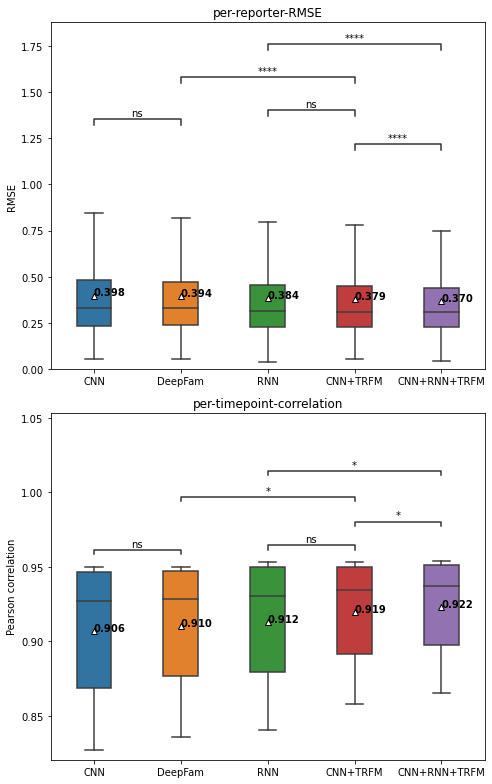

In [14]:
prr_df = pd.DataFrame(np.array(per_reporter_rmses).T, columns=["CNN", "DeepFam", "RNN", "CNN+TRFM", "CNN+RNN+TRFM"])
ptc_df = pd.DataFrame(np.array(per_timepoint_corrs).T, columns=["CNN", "DeepFam", "RNN", "CNN+TRFM", "CNN+RNN+TRFM"])
order = ["CNN", "DeepFam", "RNN", "CNN+TRFM", "CNN+RNN+TRFM"]

fig = plt.figure(figsize=(7, 11))
# Per reporter RMSE
ax = fig.add_subplot(211)
ax.set_title("per-reporter-RMSE")
ax.set_ylabel("RMSE")
ax.set_ylim([0, 1.6])
sns.boxplot(data=prr_df, showmeans=True, fliersize=0, 
            width=0.4,
            meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, ax=ax)
add_stat_annotation(ax, data=prr_df,
                    box_pairs=[("CNN", "DeepFam"), ("DeepFam", "CNN+TRFM"), ("RNN", "CNN+RNN+TRFM"), ("RNN", "CNN+TRFM"), ("CNN+TRFM", "CNN+RNN+TRFM")],
                    test="Wilcoxon", text_format="star", loc="inside", verbose=0, line_offset_to_box=-0.7
                   )

for i, model in enumerate(order):
    mean = prr_df.mean()[model]
    ax.text(x=i, y=mean, s=str(mean)[:5], weight="bold")

# Per timepoint corr
ax = fig.add_subplot(212)
ax.set_title("per-timepoint-correlation")
ax.set_ylabel("Pearson correlation")
sns.boxplot(data=ptc_df, showmeans=True, fliersize=0,
            width=0.4,
            meanprops={"markerfacecolor":"white", "markeredgecolor":"black"}, ax=ax)
add_stat_annotation(ax, data=ptc_df,
                    box_pairs=[("CNN", "DeepFam"), ("DeepFam", "CNN+TRFM"), ("RNN", "CNN+RNN+TRFM"), ("RNN", "CNN+TRFM"), ("CNN+TRFM", "CNN+RNN+TRFM")],
                    test="Wilcoxon", text_format="star", loc="inside", verbose=0
                   )
for i, model in enumerate(order):
    mean = ptc_df.mean()[model]
    ax.text(x=i, y=mean, s=str(mean)[:5], weight="bold")

fig.tight_layout()
plt.savefig("../boxplot.png", dpi=300, facecolor="w")

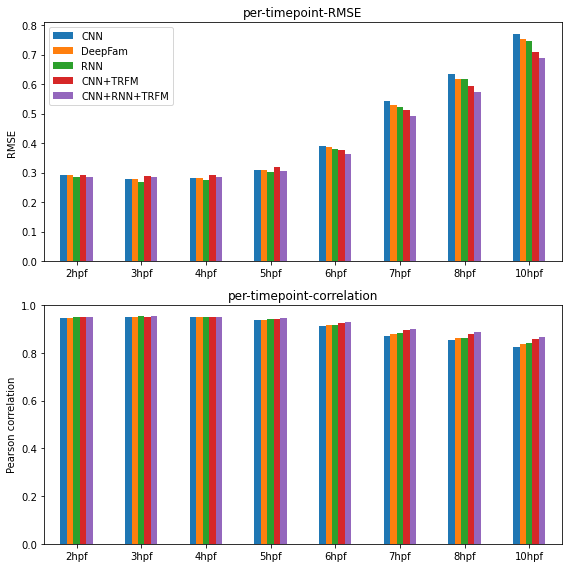

In [15]:
ptr_df = pd.DataFrame(np.array(per_timepoint_rmses).T, columns=["CNN", "DeepFam", "RNN", "CNN+TRFM", "CNN+RNN+TRFM"])
ptr_df.index = [f"{i}hpf" for i in range(2, 9)] + ["10hpf"]
ptc_df = pd.DataFrame(np.array(per_timepoint_corrs).T, columns=["CNN", "DeepFam", "RNN", "CNN+TRFM", "CNN+RNN+TRFM"])
ptc_df.index = [f"{i}hpf" for i in range(2, 9)] + ["10hpf"]

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(211)
ax.set_title("per-timepoint-RMSE")
ax.set_ylabel("RMSE")
ptr_df.plot.bar(ax=ax)
plt.xticks(rotation=0)

ax = fig.add_subplot(212)
ax.set_title("per-timepoint-correlation")
ax.set_ylabel("Pearson correlation")
ptc_df.plot.bar(ax=ax, legend=False)

plt.xticks(rotation=0)

fig.tight_layout()
plt.savefig("../barplot.png", dpi=300, facecolor="w")